In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("/Users/vidyanshsinha/Desktop/machine learning/magic+gamma+telescope/magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["class"]= (df["class"]=="g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


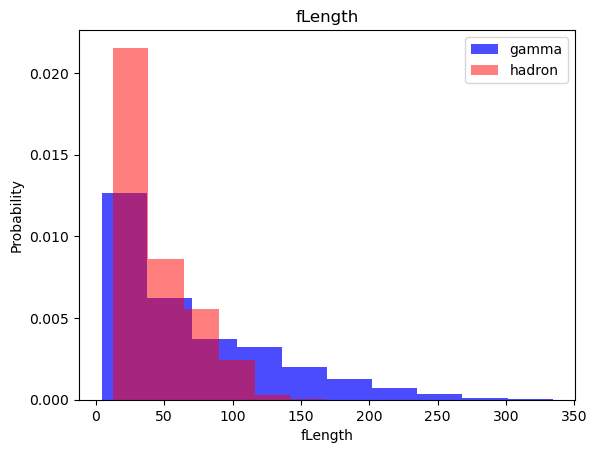

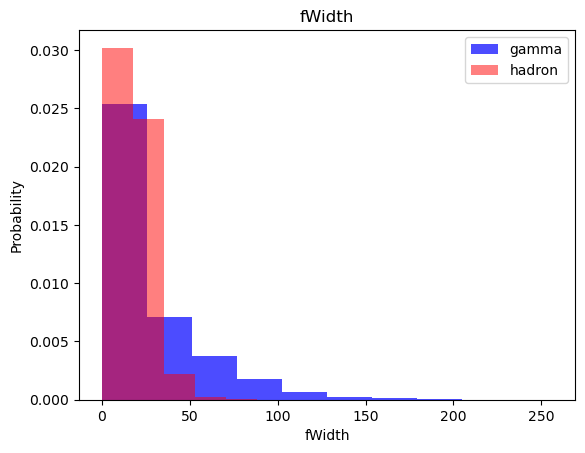

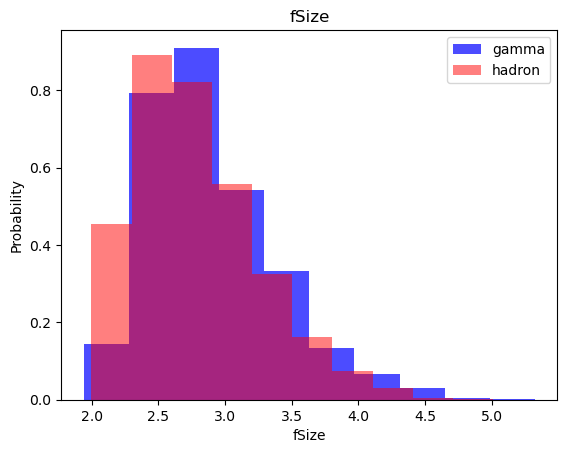

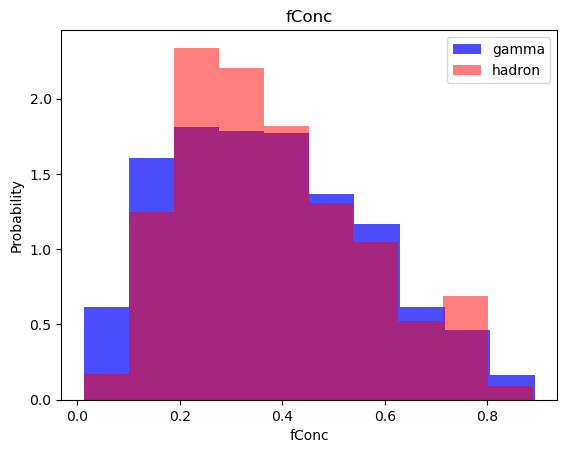

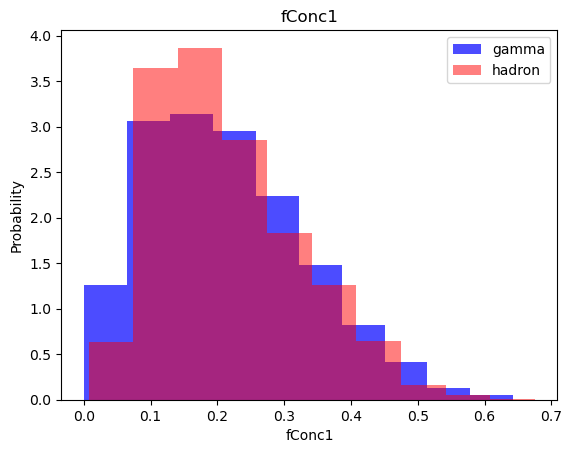

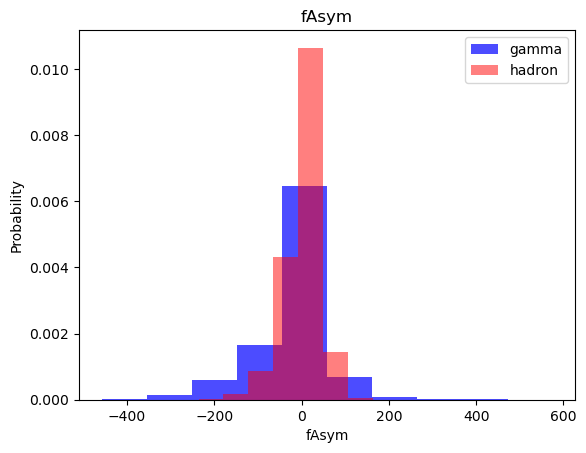

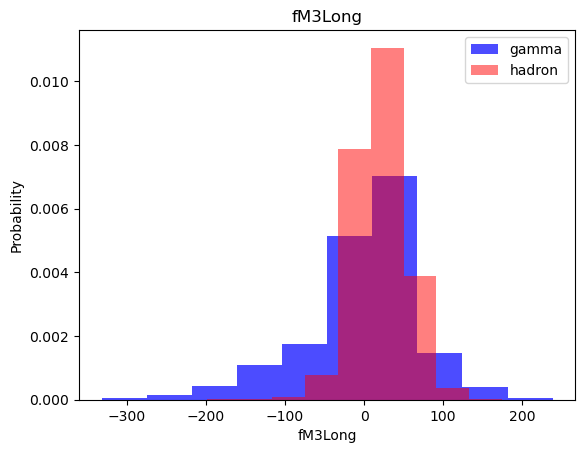

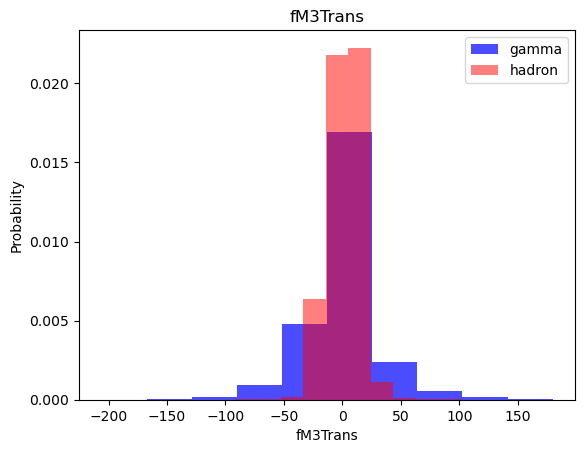

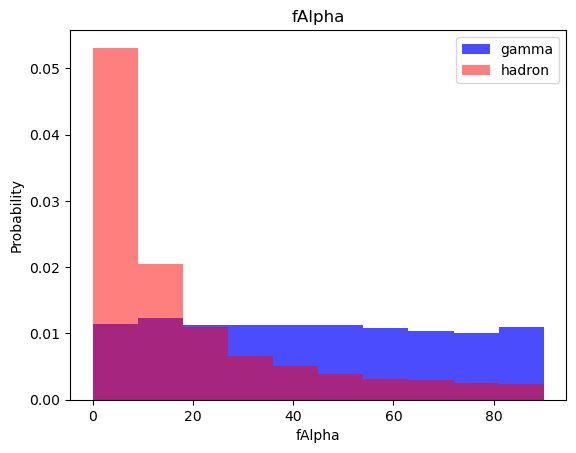

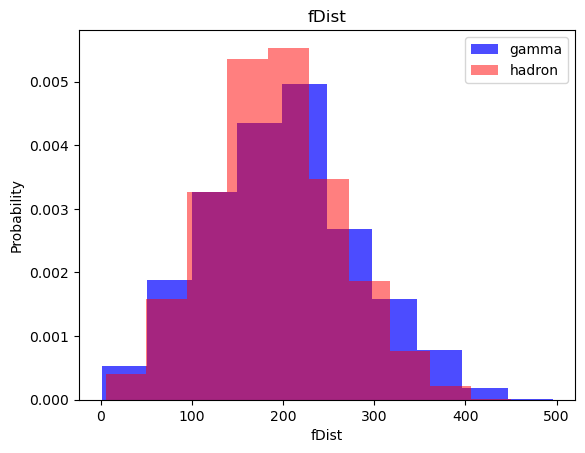

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 0][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 1][label], color='red', label='hadron', alpha=0.5, density=True) 
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()  
    plt.show() 

In [7]:
train,valid,test= np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
print(type(train))

<class 'pandas.core.frame.DataFrame'>


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe, oversample=False):
    cols = dataframe.columns  # Get column names
    x = dataframe[cols[:-1]].values  # Features (all columns except last)
    y = dataframe[cols[-1]].values  # Target (last column)
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # Scale features (not labels)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)  # Handle class imbalance

    data = np.hstack((x, y.reshape(-1, 1)))  # Ensure `y` is 2D before stacking

    return data, x, y

In [9]:
train_scaled, x_train, y_train = scale_dataset(train, oversample=True)
valid_scaled, x_valid, y_valid = scale_dataset(valid, oversample=False)
test_scaled, x_test, y_test = scale_dataset(test, oversample=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred=knn_model.predict(x_test)

In [13]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [14]:
y_test


array([0, 0, 1, ..., 1, 0, 0])

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1287
           1       0.87      0.85      0.86      2517

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.69      0.51       793
           1       0.90      0.73      0.81      3011

    accuracy                           0.72      3804
   macro avg       0.65      0.71      0.66      3804
weighted avg       0.79      0.72      0.74      3804



In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lb_model=LogisticRegression()
lb_model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=lb_model.predict(x_test)

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1400
           1       0.83      0.85      0.84      2404

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.79      0.79      0.79      3804



In [23]:
from sklearn.svm import SVC

In [24]:
svm_model=SVC()
svm_model.fit(x_train,y_train)


SVC()

In [25]:
y_predict=svm_model.predict(x_test)
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1302
           1       0.90      0.88      0.89      2502

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [26]:
import tensorflow as tf

In [27]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    plt.show()
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

In [28]:
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 00:13:49.484002: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-01 00:13:49.484152: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-01 00:13:49.484156: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-01 00:13:49.484188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-01 00:13:49.484197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow d

In [29]:
history=nn_model.fit(
    x_train,y_train,batch_size=32,epochs=100,validation_split=0.2,verbose=10
)

Epoch 1/100


2025-04-01 00:13:49.799147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-01 00:13:49.802866: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

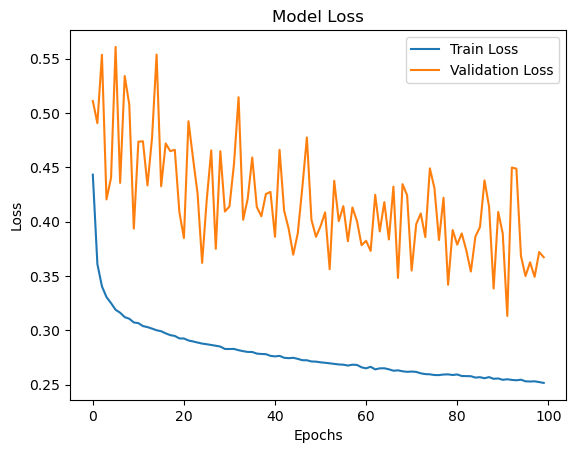

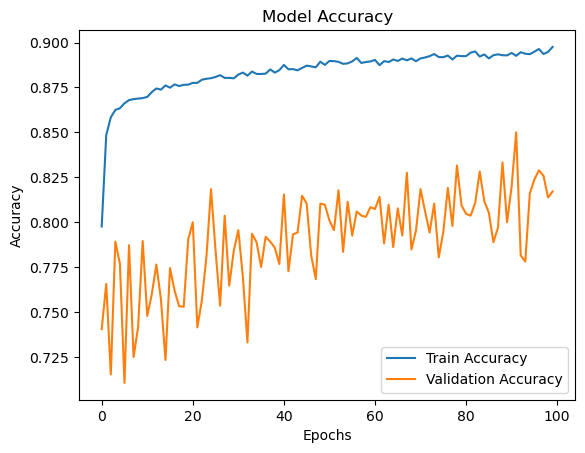

In [60]:
plot_loss(history)
plot_accuracy(history)

In [74]:

def train_model(x_train, y_train, n_nodes, drop_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(n_nodes, activation='relu', input_shape=(10,)),  # Input Layer
        tf.keras.layers.Dropout(drop_prob),  
        tf.keras.layers.Dense(n_nodes, activation='relu'),  # Hidden Layer
        tf.keras.layers.Dropout(drop_prob),  
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output Layer (Fixed)
    ])
    
    # Compile the model
    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # Fixed learning rate
        loss='binary_crossentropy',  
        metrics=['accuracy']
    )
    
    # Train the model
    history = nn_model.fit(
        x_train, y_train, 
        batch_size=batch_size, 
        epochs=epochs, 
        validation_split=0.2, 
        verbose=1  # Fixed verbose level
    )
    
    return nn_model, history

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 00:32:59.059920: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7994 - loss: 0.4619 - val_accuracy: 0.7512 - val_loss: 0.5669
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8338 - loss: 0.3988 - val_accuracy: 0.5340 - val_loss: 0.6400
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8268 - loss: 0.3945 - val_accuracy: 0.6439 - val_loss: 0.6594
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8458 - loss: 0.3616 - val_accuracy: 0.6372 - val_loss: 0.6996
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8503 - loss: 0.3624 - val_accuracy: 0.7260 - val_loss: 0.6404
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8567 - loss: 0.3518 - val_accuracy: 0.7670 - val_loss: 0.4932
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8541 - loss: 0.3697 - val_accuracy: 0.7993 - val_loss: 0.4729
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8520 - loss: 0.3578 - val_accuracy: 0.7552

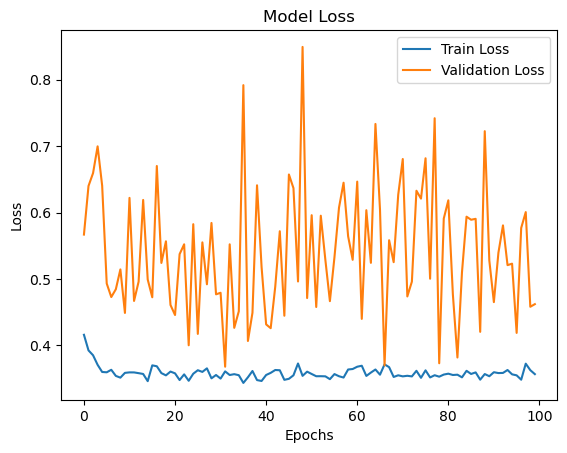

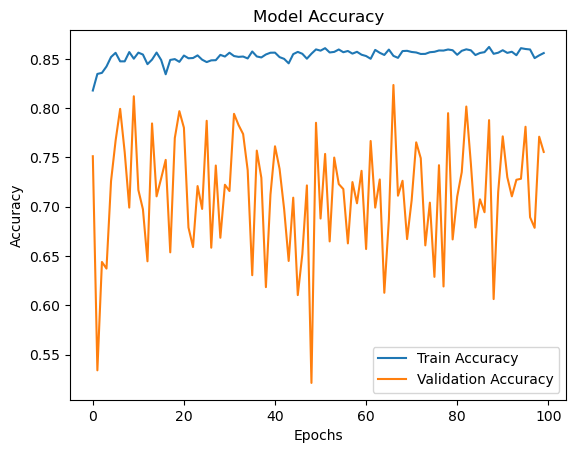

Epoch 1/100


2025-04-01 00:37:42.285745: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8010 - loss: 0.4405 - val_accuracy: 0.6742 - val_loss: 0.6407
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8459 - loss: 0.3730 - val_accuracy: 0.8295 - val_loss: 0.5234
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8399 - loss: 0.3627 - val_accuracy: 0.6789 - val_loss: 0.5466
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8494 - loss: 0.3701 - val_accuracy: 0.7142 - val_loss: 0.4190
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8561 - loss: 0.3453 - val_accuracy: 0.7680 - val_loss: 0.5278
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8455 - loss: 0.3774 - val_accuracy: 0.7777 - val_loss: 0.5680
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8555 - loss: 0.3487 - val_accuracy: 0.8379 - val_loss: 0.3256
Epoch 8/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8576 - loss: 0.3551 - val_accuracy: 0.7579

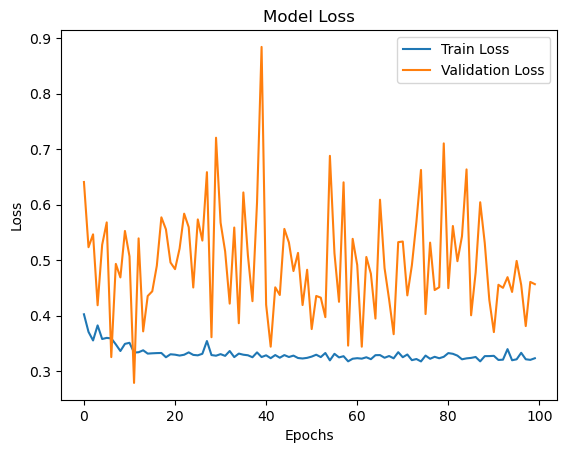

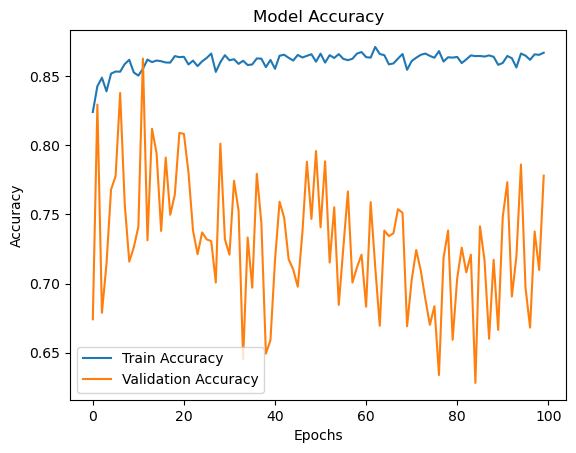

Epoch 1/100


2025-04-01 00:40:01.825247: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7852 - loss: 0.4577 - val_accuracy: 0.6876 - val_loss: 0.6307
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8465 - loss: 0.3536 - val_accuracy: 0.7139 - val_loss: 0.5257
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8495 - loss: 0.3563 - val_accuracy: 0.7592 - val_loss: 0.4676
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8665 - loss: 0.3302 - val_accuracy: 0.7206 - val_loss: 0.5541
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8582 - loss: 0.3373 - val_accuracy: 0.6980 - val_loss: 0.6013
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8639 - loss: 0.3268 - val_accuracy: 0.7381 - val_loss: 0.3958
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8680 - loss: 0.3221 - val_accuracy: 0.7555 - val_loss: 0.4294
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8652 - loss: 0.3244 - val_accuracy: 0.6812 - val_loss: 0.

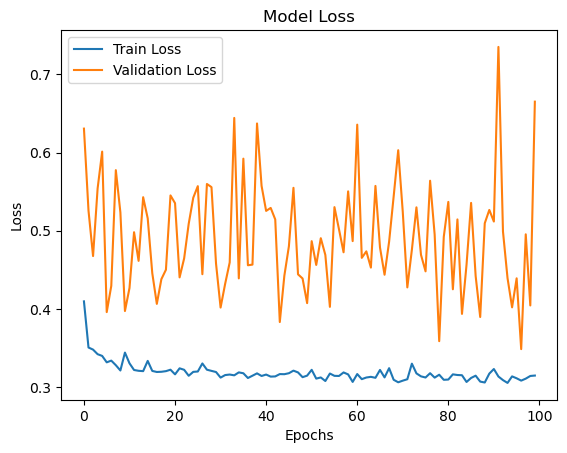

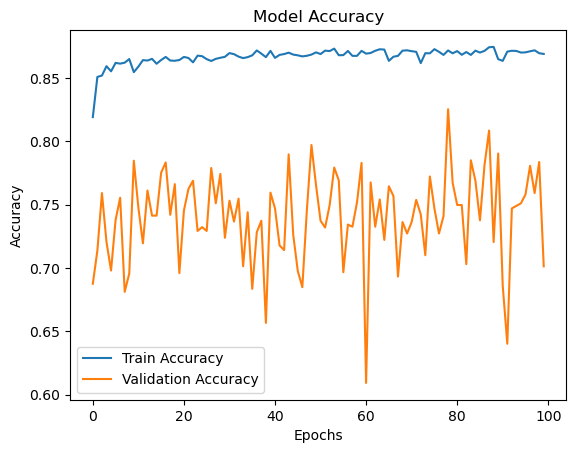

Epoch 1/100


2025-04-01 00:41:15.107835: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7509 - loss: 0.5036 - val_accuracy: 0.7720 - val_loss: 0.4481
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8545 - loss: 0.3602 - val_accuracy: 0.7260 - val_loss: 0.5653
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8620 - loss: 0.3316 - val_accuracy: 0.7707 - val_loss: 0.4512
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8664 - loss: 0.3298 - val_accuracy: 0.7697 - val_loss: 0.4457
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8600 - loss: 0.3236 - val_accuracy: 0.7737 - val_loss: 0.4301
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8609 - loss: 0.3273 - val_accuracy: 0.7744 - val_loss: 0.4541
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8725 - loss: 0.3018 - val_accuracy: 0.7307 - val_loss: 0.5069
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8689 - loss: 0.3154 - val_accuracy: 0.7919

KeyboardInterrupt: 

In [76]:
epochs=100
for n_nodes in [16,32,64]:
    for drop_prob in[0,0.2]:
        for lr in [0.1,0.005,0.001]:
            for batch_size in[32,64,128]:
                model,history=train_model(x_train,y_train,n_nodes,drop_prob,lr,batch_size,epochs)
                plot_loss(history)
                plot_accuracy(history)
                